# Machine Learning-Based Analysis of Gene Expression Profiles in Breast Cancer

**Original Educational Template**(Provided by course instructors)        
**Mohamed Hussein**(Code restructuring, enhanced clarity, detailed annotations, and GitHub publication)        
**Date:** 2025-09-12


## Notebook 2 – Preprocessing & Normalization

This notebook performs preprocessing and normalization on the breast cancer gene expression dataset.
The goal is to filter low-variance genes, normalize features using MinMaxScaler, visualize the normalized data, and save the results for downstream modeling.


## Workflow Overview:

1. Import required libraries
2. Load raw dataset and add class labels
3. Separate features and labels
4. Apply IQR filtering to remove low-variance genes
5. Normalize features using MinMaxScaler
6. Optional visualizations: histogram and PCA
7. Save normalized data

# 2.0 Import Required Libraries

In [7]:
# Import libraries for data handling, preprocessing, visualization, and PCA
import pandas as pd                                # Handle tabular data (DataFrames and CSVs)
import numpy as np                                 # Perform numerical operations and array manipulations
import matplotlib.pyplot as plt                    # Create visualizations
import seaborn as sns                              # Statistical data visualization
from sklearn.preprocessing import MinMaxScaler     # Scale features to a fixed range
from sklearn.decomposition import PCA             # Principal Component Analysis for dimensionality reduction

plt.rcParams['figure.figsize'] = (8,5)
sns.set(style='whitegrid')

# 2.1 Load Original Data

In [9]:
# Load cleaned gene expression data, transpose it so samples are rows, and add class labels
file_name = "GSE10810_Expression_Matrix_cleaned.csv"
df = pd.read_csv(file_name, index_col=0)          # Load CSV, use first column as gene names
df = df.T                                        # Transpose matrix (rows = samples, columns = genes)

labels = ['Normal']*27 + ['Cancer']*31          # Define class labels
if df.shape[0] != len(labels):
    raise ValueError(f"Number of samples (rows) = {df.shape[0]} does not match length of labels ({len(labels)})")

df['Label'] = labels                             # Add Label column
print("\nInitial data shape (samples x genes + label):", df.shape)
display(df.head())



Initial data shape (samples x genes + label): (58, 20826)


,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ITGB1-DT,TNFRSF10A-DT,LOC400499,GALR3,NUS1P3,ZNF710-AS1,SAP25,TMEM231,LOC100505915,Label
control_sample_1,8.938406,6.851183,6.976834,4.869134,4.326948,7.538037,6.159400,5.968835,6.700752,4.083799,...,4.567796,5.174148,6.796700,5.290225,4.715049,6.244124,6.262145,5.343609,5.832579,Normal
control_sample_2,7.690918,6.621644,7.691931,5.038698,4.275521,7.676686,5.985778,6.069999,7.959567,4.135048,...,4.424826,5.148048,6.775692,5.737877,4.467093,5.580614,6.404403,4.725281,5.874446,Normal
control_sample_3,7.896712,6.662755,7.365933,5.152850,4.294037,7.459939,6.040109,6.029395,7.324931,4.105643,...,4.629768,4.978678,6.815992,5.809768,4.412147,5.929512,6.583424,5.258202,5.982806,Normal
control_sample_4,8.264164,6.857314,6.635037,5.118771,4.321169,7.374757,6.168062,6.041518,6.564204,3.936414,...,4.480501,4.881933,6.756850,5.557724,4.474714,6.226731,6.176037,5.393638,5.657388,Normal
control_sample_5,7.861269,6.774225,6.699210,5.086458,4.356412,7.424526,6.191636,6.163735,6.840854,4.045273,...,4.453589,5.106010,6.826434,5.547210,4.205264,5.512682,6.142524,4.957848,5.847746,Normal


# 2.2 Separate Features and Labels

In [11]:
# Separate input features (X) from target labels (y)
X = df.drop(columns=['Label'])                   # All columns except Label
y = df['Label']                                  # Label column
print("\nFeatures shape:", X.shape)
print("Labels shape:", y.shape)



Features shape: (58, 20825)
Labels shape: (58,)


# 2.3 IQR Filtering to Remove Low-Variance Gene

In [13]:
# Compute Interquartile Range (IQR) for each gene and filter out low-variance genes
iqr = X.apply(lambda x: np.percentile(x,75) - np.percentile(x,25), axis=0)
iqr_thresh = iqr.quantile(0.25)                  # Set threshold as 25th percentile
filtered_genes = iqr[iqr > iqr_thresh].index.tolist()  # Keep high-variance genes

X_filtered = X[filtered_genes].copy()           # Create filtered dataset
df_filtered = X_filtered.copy()
df_filtered['Label'] = y.values                 # Add labels back to filtered data
print("\nShape after IQR filtering (high-variance genes):", df_filtered.shape)



Shape after IQR filtering (high-variance genes): (58, 15619)


# 2.4 Normalize Features Using MinMaxScaler

In [15]:
# Scale features to [0,1] range to standardize data before analysis
X_features = df_filtered.drop(columns=['Label']) # Select numeric features
scaler = MinMaxScaler()                           # Initialize scaler
X_normalized = scaler.fit_transform(X_features)  # Fit and transform features

X_normalized_df = pd.DataFrame(X_normalized, columns=X_features.columns) # Convert to DataFrame
X_normalized_df['Label'] = df_filtered['Label'].values                   # Add labels
print("\nShape after MinMax normalization:", X_normalized_df.shape)


Shape after MinMax normalization: (58, 15619)


# 2.5.1 Histogram of Normalized Expression Values

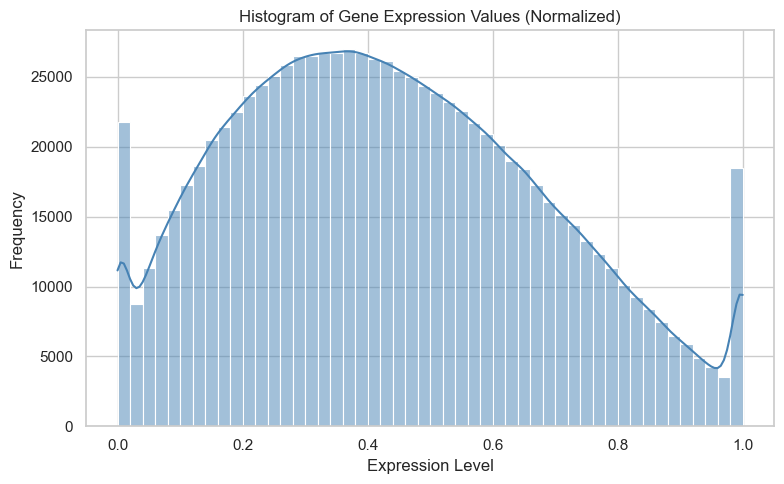

In [17]:
# Visualize distribution of gene expression values after normalization
plt.figure(figsize=(8,5))
sns.histplot(X_normalized_df.drop(columns=['Label']).values.flatten(), bins=50, kde=True, color='steelblue')
plt.title("Histogram of Gene Expression Values (Normalized)")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("histogram_distribution_normalized.png")  # Save figure
plt.show()

# 2.5.2 PCA Plot (2 Components)

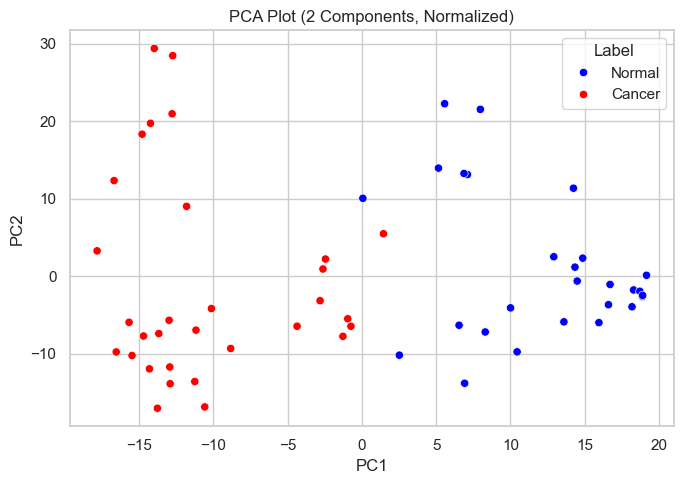

In [19]:
# Perform PCA on normalized features to reduce dimensionality and visualize sample separation
numeric_cols = X_normalized_df.drop(columns=['Label'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_cols.values)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) # PCA coordinates
pca_df['Label'] = df_filtered['Label'].values        # Add labels for plotting

plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette={'Normal':'blue','Cancer':'red'})
plt.title("PCA Plot (2 Components, Normalized)")
plt.tight_layout()
plt.savefig("pca_plot_normalized.png")              # Save figure
plt.show()

# 2.6 Save Normalized Data and PCA Coordinates

In [21]:
# Save normalized dataset and PCA coordinates for downstream analysis
X_normalized_df.to_csv('data_normalized_minmax.csv', index=False)  # Normalized data
pca_df.to_csv('pca_normalized_coordinates.csv', index=False)       # PCA coordinates

print("\nPreprocessing & Normalization completed successfully!")
print("Normalized data saved as 'data_normalized_minmax.csv'")
print("PCA coordinates saved as 'pca_normalized_coordinates.csv'")



Preprocessing & Normalization completed successfully!
Normalized data saved as 'data_normalized_minmax.csv'
PCA coordinates saved as 'pca_normalized_coordinates.csv'


**Next Step:** Notebook 3 will focus on **Feature Selection**.

### Export Notebook 2 to HTML

In [36]:
!jupyter nbconvert --to html --embed-images "Notebook_2_Preprocessing_Normalization.ipynb" --output "Notebook_2_Preprocessing_Normalization.html"

[NbConvertApp] Converting notebook Notebook_2_Preprocessing_Normalization.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 399474 bytes to Notebook_2_Preprocessing_Normalization.html
